# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

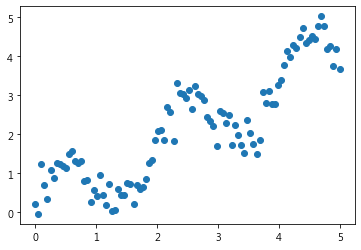

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5019105904989016


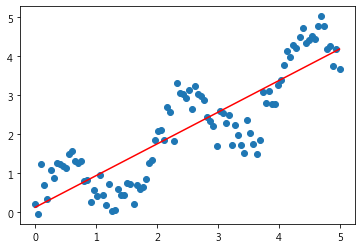

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

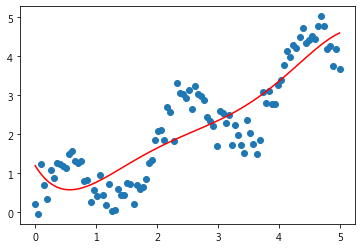

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.552714    3.30922916 -1.45146882  0.28664146 -0.02057038]
interception:  1.1966724510041846


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.19667245, 1.07600342, 0.97112048, 0.88096782, 0.80453278,
       0.74084503, 0.68897576, 0.64803685, 0.61718007, 0.59559629,
       0.58251465, 0.57720172, 0.57896075, 0.58713082, 0.60108604,
       0.62023471, 0.64401857, 0.67191192, 0.70342087, 0.73808248,
       0.77546398, 0.81516195, 0.85680148, 0.90003544, 0.94454355,
       0.99003169, 1.036231  , 1.08289712, 1.12980933, 1.1767698 ,
       1.22360275, 1.2701536 , 1.31628824, 1.36189214, 1.4068696 ,
       1.45114289, 1.49465148, 1.53735119, 1.57921342, 1.6202243 ,
       1.6603839 , 1.69970543, 1.7382144 , 1.77594783, 1.81295341,
       1.84928875, 1.88502049, 1.92022357, 1.95498033, 1.98937979,
       2.02351676, 2.05749109, 2.09140683, 2.12537139, 2.1594948 ,
       2.19388885, 2.22866626, 2.26393994, 2.29982211, 2.33642351,
       2.37385261, 2.41221478, 2.45161147, 2.49213942, 2.53388984,
       2.57694759, 2.62139038, 2.66728795, 2.71470129, 2.76368177,
       2.81427037, 2.86649689, 2.92037907, 2.97592184, 3.03311

In [15]:
regr_poly.predict(X_poly)

array([1.19667245, 1.07600342, 0.97112048, 0.88096782, 0.80453278,
       0.74084503, 0.68897576, 0.64803685, 0.61718007, 0.59559629,
       0.58251465, 0.57720172, 0.57896075, 0.58713082, 0.60108604,
       0.62023471, 0.64401857, 0.67191192, 0.70342087, 0.73808248,
       0.77546398, 0.81516195, 0.85680148, 0.90003544, 0.94454355,
       0.99003169, 1.036231  , 1.08289712, 1.12980933, 1.1767698 ,
       1.22360275, 1.2701536 , 1.31628824, 1.36189214, 1.4068696 ,
       1.45114289, 1.49465148, 1.53735119, 1.57921342, 1.6202243 ,
       1.6603839 , 1.69970543, 1.7382144 , 1.77594783, 1.81295341,
       1.84928875, 1.88502049, 1.92022357, 1.95498033, 1.98937979,
       2.02351676, 2.05749109, 2.09140683, 2.12537139, 2.1594948 ,
       2.19388885, 2.22866626, 2.26393994, 2.29982211, 2.33642351,
       2.37385261, 2.41221478, 2.45161147, 2.49213942, 2.53388984,
       2.57694759, 2.62139038, 2.66728795, 2.71470129, 2.76368177,
       2.81427037, 2.86649689, 2.92037907, 2.97592184, 3.03311

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

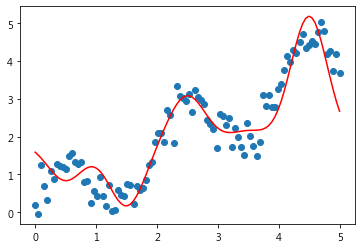

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.99603304 -1.66975462  1.250482    0.30908233  3.34458635]
interception:  1.838095672004172


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

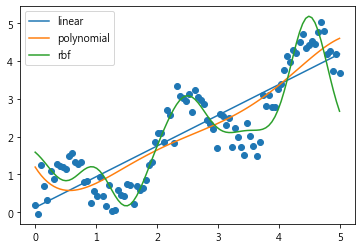

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5019105904989016


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4339958226266203


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.250694208220182
